## Monte Carlo approximation

In [3]:
try:
    import jax
except:
    %pip install jax jaxlib
    import jax
import jax.numpy as jnp

try:
    import matplotlib.pyplot as plt
except:
    %pip install matplotlib
    import matplotlib.pyplot as plt

try:
    import seaborn as sns
except:
    %pip install seaborn
    import seaborn as sns

In [4]:
import os
import matplotlib.pyplot as plt

DEFAULT_WIDTH = 6.0
# GOLDEN_MEAN = (5**0.5 - 1.0) / 2.0  # Aesthetic ratio
DEFAULT_HEIGHT = 1.5
SIZE_SMALL = 9  # Caption size in the book
DEFAULT_FIG_PATH = "figures"
# SPLINE_COLOR = 'gray'


def latexify(
    width_scale_factor=1,
    height_scale_factor=1,
    fig_width=None,
    fig_height=None,
    font_size=SIZE_SMALL,
):
    f"""
    width_scale_factor: float, DEFAULT_WIDTH will be divided by this number, DEFAULT_WIDTH is page width: {DEFAULT_WIDTH} inches.
    height_scale_factor: float, DEFAULT_HEIGHT will be divided by this number, DEFAULT_HEIGHT is {DEFAULT_HEIGHT} inches.
    fig_width: float, width of the figure in inches (if this is specified, width_scale_factor is ignored)
    fig_height: float, height of the figure in inches (if this is specified, height_scale_factor is ignored)
    font_size: float, font size
    """
    if fig_width is None:
        fig_width = DEFAULT_WIDTH / width_scale_factor
    if fig_height is None:
        fig_height = DEFAULT_HEIGHT / height_scale_factor

    # use TrueType fonts so they are embedded
    # https://stackoverflow.com/questions/9054884/how-to-embed-fonts-in-pdfs-produced-by-matplotlib
    # https://jdhao.github.io/2018/01/18/mpl-plotting-notes-201801/
    plt.rcParams["pdf.fonttype"] = 42

    # Font sizes
    # SIZE_MEDIUM = 14
    # SIZE_LARGE = 24
    # https://stackoverflow.com/a/39566040
    plt.rc("font", size=font_size)  # controls default text sizes
    plt.rc("axes", titlesize=font_size)  # fontsize of the axes title
    plt.rc("axes", labelsize=font_size)  # fontsize of the x and y labels
    plt.rc("xtick", labelsize=font_size)  # fontsize of the tick labels
    plt.rc("ytick", labelsize=font_size)  # fontsize of the tick labels
    plt.rc("legend", fontsize=font_size)  # legend fontsize
    plt.rc("figure", titlesize=font_size)  # fontsize of the figure title

    # latexify: https://nipunbatra.github.io/blog/visualisation/2014/06/02/latexify.html
    plt.rcParams["backend"] = "ps"
    if not "NO_SAVE_FIGS" in os.environ:  # To remove latex dependency from GitHub actions
        plt.rc("text", usetex=True)
    plt.rc("font", family="serif")
    plt.rc("figure", figsize=(fig_width, fig_height))


def savefig(f_name, fig_dir=DEFAULT_FIG_PATH, tight_layout=True, *args, **kwargs):
    if len(f_name) == 0:
        return
    fname_full = os.path.join(fig_dir, f_name)

    if not "NO_SAVE_FIGS" in os.environ:
        print("saving image to {}".format(fname_full))
        if tight_layout:
            plt.tight_layout(pad=0)
        print("Figure size:", plt.gcf().get_size_inches())
        plt.savefig(fname_full, pad_inches=0.0, pad=0, h_pad=0, w_pad=0, *args, **kwargs)
        # bbox_inches="tight",  # This changes the size of the figure

In [5]:
import os

# LATEXIFY = "LATEXIFY" in os.environ
LATEXIFY=1
if LATEXIFY:
    # import sys

    # sys.path.append("content")  # Don't change to "../scripts", instead, run this nb from repo's root with ipython
    # import latexify, savefig

    latexify(width_scale_factor=2,fig_height=1.5)
    # savefig(save_name)

0.34349513
saving image to /content/change_of_vars_demo1d_latexified.pdf


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Figure size: [3.  1.5]


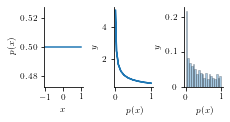

In [6]:
# save_name="change_of_vars_demo1d_latexified.pdf" 

xs = jnp.linspace(-1,1,21)
a = -1
b = 1
prob_x = 1/(b-a) * jnp.ones(len(xs))

fn = lambda x: x**2
ys = fn(xs)

#analytic
prob_y = 1/(2*jnp.sqrt(ys))

#monte carlo
n = 1000
key=jax.random.PRNGKey(42)
uniform_samples = jax.random.uniform(key=key,shape=(n,),minval=a,maxval=b)
tranisformed_samples = fn(uniform_samples)

print(jnp.mean(tranisformed_samples))

fig, ax = plt.subplots(nrows=1, ncols=3)
ax[0].plot(xs, prob_x, "-")

ax[0].set_xlabel("$x$")
ax[0].set_ylabel("$p(x)$")
ax[1].plot(ys, prob_y, "-")
ax[1].set_xlabel("$p(x)$")
ax[1].set_ylabel("$y$")
sns.distplot(tranisformed_samples, kde=False, ax=ax[2], bins=20, norm_hist=True, hist_kws=dict(edgecolor="k", linewidth=0.5))
ax[2].set_xlabel("$p(x)$")
ax[2].set_ylabel("$y$")
ax[2].set_yticklabels(['0','0.1','0.2'])
sns.despine()
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)
if LATEXIFY:
  figsize = None
  savefig("/content/change_of_vars_demo1d_latexified.pdf") 

else:
  figsize = (10,4)

plt.savefig("/content/changeOfVars2.pdf")

plt.show()
